# Analisis Kluster untuk Menilik Kerataan Pendidikan di Indonesia
**Kelompok:** 11

## Pengambilan data

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
APM = pd.read_csv("APM 2022.csv", sep = ";")
APK = pd.read_csv("APK 2022.csv", sep = ";")
APS = pd.read_csv("APS 2022.csv", sep = ";")
AMH = pd.read_csv("AMH 15-24 2022.csv", sep = ";")
TPP = pd.read_csv("TPP 2022.csv", sep = ";")
TPPO = pd.read_csv("TPPO 2022.csv", sep = ";")
RLS = pd.read_csv("RLS 2022.csv", sep = ";")
TIK = pd.read_csv("TIK 2022.csv", sep = ";")

#### Angka Partisipasi Murni (APM)

In [3]:
APM

,﻿nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Angka Partisipasi Murni ( A P M ),SM/SMK/MA/Paket C,2022,Tahun,71.16,ACEH
1,Angka Partisipasi Murni ( A P M ),SM/SMK/MA/Paket C,2022,Tahun,68.27,SUMATERA UTARA
2,Angka Partisipasi Murni ( A P M ),SM/SMK/MA/Paket C,2022,Tahun,68.38,SUMATERA BARAT
3,Angka Partisipasi Murni ( A P M ),SM/SMK/MA/Paket C,2022,Tahun,63.87,RIAU
4,Angka Partisipasi Murni ( A P M ),SM/SMK/MA/Paket C,2022,Tahun,60.73,JAMBI
...,...,...,...,...,...,...
100,Angka Partisipasi Murni ( A P M ),SD/MI/Paket A,2022,Tahun,96.90,MALUKU
101,Angka Partisipasi Murni ( A P M ),SD/MI/Paket A,2022,Tahun,97.27,MALUKU UTARA
102,Angka Partisipasi Murni ( A P M ),SD/MI/Paket A,2022,Tahun,94.31,PAPUA BARAT
103,Angka Partisipasi Murni ( A P M ),SD/MI/Paket A,2022,Tahun,81.66,PAPUA


In [4]:
APM = APM[["nama_variabel_turunan", "data_content", "nama_item_vertical_variabel"]]
APM = APM.rename(columns = {"nama_variabel_turunan": "jenjang", "data_content": "data",
                             "nama_item_vertical_variabel": "provinsi"})
APM["jenjang"] = APM["jenjang"].replace(['SD/MI/Paket A', 'SMP/Mts/Paket B', 'SM/SMK/MA/Paket C'],
                                        ['SD', 'SMP', 'SMA'])

In [5]:
Provinsi = APM["provinsi"].unique()

In [6]:
APM_SD = APM.loc[APM["jenjang"] == "SD"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)
APM_SMP = APM.loc[APM["jenjang"] == "SMP"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)
APM_SMA = APM.loc[APM["jenjang"] == "SMA"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)

In [7]:
#HALO HALOO!
APM2 = pd.DataFrame(np.column_stack([APM_SD, APM_SMP, APM_SMA]), columns = ["APM SD", "APM SMP", "APM SMA"])

#### Angka Partisipasi Kasar (APK)

In [8]:
APK

,﻿nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Angka Partisipasi Kasar ( A P K ),SM/SMK/MA/Paket C,2022,Tahun,92.53,ACEH
1,Angka Partisipasi Kasar ( A P K ),SM/SMK/MA/Paket C,2022,Tahun,97.23,SUMATERA UTARA
2,Angka Partisipasi Kasar ( A P K ),SM/SMK/MA/Paket C,2022,Tahun,90.66,SUMATERA BARAT
3,Angka Partisipasi Kasar ( A P K ),SM/SMK/MA/Paket C,2022,Tahun,84.85,RIAU
4,Angka Partisipasi Kasar ( A P K ),SM/SMK/MA/Paket C,2022,Tahun,84.33,JAMBI
...,...,...,...,...,...,...
100,Angka Partisipasi Kasar ( A P K ),SD/MI/Paket A,2022,Tahun,111.05,MALUKU
101,Angka Partisipasi Kasar ( A P K ),SD/MI/Paket A,2022,Tahun,108.05,MALUKU UTARA
102,Angka Partisipasi Kasar ( A P K ),SD/MI/Paket A,2022,Tahun,110.42,PAPUA BARAT
103,Angka Partisipasi Kasar ( A P K ),SD/MI/Paket A,2022,Tahun,94.26,PAPUA


In [9]:
APK = APK[["nama_variabel_turunan", "data_content", "nama_item_vertical_variabel"]]
APK = APK.rename(columns = {"nama_variabel_turunan": "jenjang", "data_content": "data",
                             "nama_item_vertical_variabel": "provinsi"})
APK["jenjang"] = APK["jenjang"].replace(['SD/MI/Paket A', 'SMP/Mts/Paket B', 'SM/SMK/MA/Paket C'],
                                        ['SD', 'SMP', 'SMA'])

In [10]:
APK_SD = APK.loc[APK["jenjang"] == "SD"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)
APK_SMP = APK.loc[APK["jenjang"] == "SMP"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)
APK_SMA = APK.loc[APK["jenjang"] == "SMA"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)

#### Angka Partisipasi Sekolah (APS)

In [11]:
APS

,﻿nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Angka Partisipasi Sekolah ( A P S ),19-24,2022,Tahun,31.72,ACEH
1,Angka Partisipasi Sekolah ( A P S ),19-24,2022,Tahun,26.60,SUMATERA UTARA
2,Angka Partisipasi Sekolah ( A P S ),19-24,2022,Tahun,35.41,SUMATERA BARAT
3,Angka Partisipasi Sekolah ( A P S ),19-24,2022,Tahun,28.65,RIAU
4,Angka Partisipasi Sekolah ( A P S ),19-24,2022,Tahun,23.35,JAMBI
...,...,...,...,...,...,...
135,Angka Partisipasi Sekolah ( A P S ),7-12,2022,Tahun,99.55,MALUKU
136,Angka Partisipasi Sekolah ( A P S ),7-12,2022,Tahun,99.13,MALUKU UTARA
137,Angka Partisipasi Sekolah ( A P S ),7-12,2022,Tahun,98.27,PAPUA BARAT
138,Angka Partisipasi Sekolah ( A P S ),7-12,2022,Tahun,84.35,PAPUA


In [12]:
APS = APS[["nama_variabel_turunan", "data_content", "nama_item_vertical_variabel"]]
APS = APS.rename(columns = {"nama_variabel_turunan": "usia", "data_content": "data",
                             "nama_item_vertical_variabel": "provinsi"})

In [13]:
APS_1 = APS.loc[APS["usia"] == "7-12"].drop(["provinsi", "usia"], axis = 1).reset_index(drop = True)
APS_2 = APS.loc[APS["usia"] == "13-15"].drop(["provinsi", "usia"], axis = 1).reset_index(drop = True)
APS_3 = APS.loc[APS["usia"] == "16-18"].drop(["provinsi", "usia"], axis = 1).reset_index(drop = True)

#### Angka Melek Huruf (AMH)

In [14]:
AMH

,﻿nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.94,ACEH
1,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.92,SUMATERA UTARA
2,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.87,SUMATERA BARAT
3,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.92,RIAU
4,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.90,JAMBI
5,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.95,SUMATERA SELATAN
6,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.85,BENGKULU
7,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.90,LAMPUNG
8,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.88,KEP. BANGKA BELITUNG
9,Angka Melek Huruf Penduduk Umur 15-24 Tahun Me...,Tidak Ada,2022,Tahun,99.96,KEP. RIAU


In [15]:
AMH = AMH[["data_content"]]

#### Tingkat Penyelesaian Pendidikan (TPP)

In [16]:
TPP

,﻿nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SMA / Sederajat,2022,Tahun,70.67,ACEH
1,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SMA / Sederajat,2022,Tahun,77.16,SUMATERA UTARA
2,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SMA / Sederajat,2022,Tahun,65.96,SUMATERA BARAT
3,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SMA / Sederajat,2022,Tahun,66.91,RIAU
4,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SMA / Sederajat,2022,Tahun,65.85,JAMBI
...,...,...,...,...,...,...
100,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SD / Sederajat,2022,Tahun,98.98,MALUKU
101,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SD / Sederajat,2022,Tahun,97.72,MALUKU UTARA
102,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SD / Sederajat,2022,Tahun,93.94,PAPUA BARAT
103,Tingkat Penyelesaian Pendidikan Menurut Jenjan...,SD / Sederajat,2022,Tahun,81.99,PAPUA


In [17]:
TPP = TPP[["nama_variabel_turunan", "data_content", "nama_item_vertical_variabel"]]
TPP = TPP.rename(columns = {"nama_variabel_turunan": "jenjang", "data_content": "data",
                             "nama_item_vertical_variabel": "provinsi"})
TPP["jenjang"] = TPP["jenjang"].replace(['SD / Sederajat', 'SMP / Sederajat', 'SMA / Sederajat'],
                                        ['SD', 'SMP', 'SMA'])

In [18]:
TPP_SD = TPP.loc[TPP["jenjang"] == "SD"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)
TPP_SMP = TPP.loc[TPP["jenjang"] == "SMP"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)
TPP_SMA = TPP.loc[TPP["jenjang"] == "SMA"].drop(["provinsi", "jenjang"], axis = 1).reset_index(drop = True)

#### Tingkat Partisipasi dalam Pembelajaran yang Terorganisir (TPPO)

In [19]:
TPPO

,﻿nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,97.45,ACEH
1,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,96.37,SUMATERA UTARA
2,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,95.78,SUMATERA BARAT
3,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,95.41,RIAU
4,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,95.86,JAMBI
5,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,95.56,SUMATERA SELATAN
6,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,94.84,BENGKULU
7,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,96.31,LAMPUNG
8,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,98.33,KEP. BANGKA BELITUNG
9,Tingkat partisipasi dalam pembelajaran yang te...,Tidak Ada,2022,Tahun,87.55,KEP. RIAU


In [20]:
TPPO = TPPO[["data_content"]]

#### Rata-Rata Lama Sekolah (RLS)

In [21]:
RLS

,﻿nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,9.79,ACEH
1,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,9.99,SUMATERA UTARA
2,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,9.51,SUMATERA BARAT
3,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,9.54,RIAU
4,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,9.07,JAMBI
5,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,8.82,SUMATERA SELATAN
6,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,9.28,BENGKULU
7,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,8.61,LAMPUNG
8,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,8.57,KEP. BANGKA BELITUNG
9,Rata-Rata Lama Sekolah Penduduk Umur ≥ 15 Tahu...,Tidak Ada,2022,Tahun,10.46,KEP. RIAU


In [22]:
RLS = RLS[["data_content"]]

#### Proporsi Keterampilan Teknologi Informasi dan Komputer (TIK)

In [23]:
TIK

,﻿nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,85.72,ACEH
1,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,92.83,SUMATERA UTARA
2,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,94.21,SUMATERA BARAT
3,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,94.95,RIAU
4,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,93.63,JAMBI
5,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,92.77,SUMATERA SELATAN
6,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,94.03,BENGKULU
7,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,93.98,LAMPUNG
8,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,96.11,KEP. BANGKA BELITUNG
9,Proporsi Remaja Dan Dewasa Usia 15-24 Tahun De...,Tidak Ada,2022,Tahun,96.52,KEP. RIAU


In [24]:
TIK = TIK[["data_content"]]

### Data gabungan

In [25]:
df = pd.DataFrame(np.column_stack([Provinsi, APM_SD, APM_SMP, APM_SMA, APK_SD, APK_SMP, APK_SMA, APS_1, APS_2, APS_3,
                                  AMH, TPP_SD, TPP_SMP, TPP_SMA, TPPO, RLS, TIK]),
                  columns = ["Provinsi", "APM SD", "APM SMP", "APM SMA", "APK SD", "APK SMP", "APK SMA", "APS 7-12 tahun",
                            "APS 13-15 tahun", "APS 16-18 tahun", "AMH", "TPP SD", "TPP SMP",
                            "TPP SMA", "TPPO", "RLS", "TIK"])
df = df.set_index("Provinsi")

In [26]:
df.head()

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK
Provinsi,,,,,,,,,,,,,,,,
ACEH,99.07,88.21,71.16,108.34,95.02,92.53,99.44,97.96,83.1,99.94,99.45,97.63,70.67,97.45,9.79,85.72
SUMATERA UTARA,98.0,81.84,68.27,108.31,90.31,97.23,99.5,96.78,78.66,99.92,98.74,92.84,77.16,96.37,9.99,92.83
SUMATERA BARAT,98.8,78.86,68.38,108.47,92.57,90.66,99.55,96.52,83.71,99.87,97.87,88.83,65.96,95.78,9.51,94.21
RIAU,97.8,80.43,63.87,105.82,94.45,84.85,99.61,95.72,77.32,99.92,98.2,88.53,66.91,95.41,9.54,94.95
JAMBI,99.33,79.93,60.73,109.55,87.84,84.33,99.33,96.2,72.53,99.9,97.62,86.57,65.85,95.86,9.07,93.63


## Praproses data (Bagian 1)

In [27]:
df_clean = df.copy()

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, ACEH to INDONESIA
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APM SD           35 non-null     object
 1   APM SMP          35 non-null     object
 2   APM SMA          35 non-null     object
 3   APK SD           35 non-null     object
 4   APK SMP          35 non-null     object
 5   APK SMA          35 non-null     object
 6   APS 7-12 tahun   35 non-null     object
 7   APS 13-15 tahun  35 non-null     object
 8   APS 16-18 tahun  35 non-null     object
 9   AMH              35 non-null     object
 10  TPP SD           35 non-null     object
 11  TPP SMP          35 non-null     object
 12  TPP SMA          35 non-null     object
 13  TPPO             35 non-null     object
 14  RLS              35 non-null     object
 15  TIK              35 non-null     object
dtypes: object(16)
memory usage: 4.6+ KB


### Pengubahan tipe data

In [29]:
df_clean = df_clean.astype(np.float64)

In [30]:
df_clean.head()

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK
Provinsi,,,,,,,,,,,,,,,,
ACEH,99.07,88.21,71.16,108.34,95.02,92.53,99.44,97.96,83.10,99.94,99.45,97.63,70.67,97.45,9.79,85.72
SUMATERA UTARA,98.00,81.84,68.27,108.31,90.31,97.23,99.50,96.78,78.66,99.92,98.74,92.84,77.16,96.37,9.99,92.83
SUMATERA BARAT,98.80,78.86,68.38,108.47,92.57,90.66,99.55,96.52,83.71,99.87,97.87,88.83,65.96,95.78,9.51,94.21
RIAU,97.80,80.43,63.87,105.82,94.45,84.85,99.61,95.72,77.32,99.92,98.20,88.53,66.91,95.41,9.54,94.95
JAMBI,99.33,79.93,60.73,109.55,87.84,84.33,99.33,96.20,72.53,99.90,97.62,86.57,65.85,95.86,9.07,93.63


### Penanganan data hilang

In [31]:
df_clean.isnull().sum()

APM SD             0
APM SMP            0
APM SMA            0
APK SD             0
APK SMP            0
APK SMA            0
APS 7-12 tahun     0
APS 13-15 tahun    0
APS 16-18 tahun    0
AMH                0
TPP SD             0
TPP SMP            0
TPP SMA            0
TPPO               0
RLS                0
TIK                0
dtype: int64

### Penanganan data duplikat

In [32]:
df_clean.duplicated()

Provinsi
ACEH                    False
SUMATERA UTARA          False
SUMATERA BARAT          False
RIAU                    False
JAMBI                   False
SUMATERA SELATAN        False
BENGKULU                False
LAMPUNG                 False
KEP. BANGKA BELITUNG    False
KEP. RIAU               False
DKI JAKARTA             False
JAWA BARAT              False
JAWA TENGAH             False
DI YOGYAKARTA           False
JAWA TIMUR              False
BANTEN                  False
BALI                    False
NUSA TENGGARA BARAT     False
NUSA TENGGARA TIMUR     False
KALIMANTAN BARAT        False
KALIMANTAN TENGAH       False
KALIMANTAN SELATAN      False
KALIMANTAN TIMUR        False
KALIMANTAN UTARA        False
SULAWESI UTARA          False
SULAWESI TENGAH         False
SULAWESI SELATAN        False
SULAWESI TENGGARA       False
GORONTALO               False
SULAWESI BARAT          False
MALUKU                  False
MALUKU UTARA            False
PAPUA BARAT             False
P

### Penghapusan baris

In [33]:
df_clean = df_clean.drop("INDONESIA")

## Eksplorasi dan Visualisasi Data

In [34]:
#Statistika deskriptif
df_clean.describe()

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,97.264706,78.737941,63.109118,106.811471,90.436471,87.817353,98.791471,95.456176,75.139412,99.627353,96.992941,89.565882,64.683235,94.192647,9.246765,90.128529
std,3.182961,6.176049,5.955455,3.504032,4.213040,6.006035,2.580378,3.306325,5.847607,1.348333,3.089107,5.949588,10.859495,6.517615,0.817360,11.773200
min,81.660000,59.140000,47.630000,94.260000,79.370000,75.490000,84.350000,81.660000,65.930000,92.040000,81.990000,66.160000,38.470000,60.320000,7.310000,33.060000
25%,97.317500,76.152500,59.797500,105.362500,87.850000,84.805000,99.070000,94.657500,70.827500,99.850000,96.992500,87.830000,59.312500,94.875000,8.580000,90.637500
50%,98.180000,79.120000,62.700000,107.035000,90.380000,87.385000,99.360000,96.295000,74.430000,99.905000,97.685000,90.510000,66.340000,95.485000,9.225000,93.805000
75%,98.785000,82.762500,66.387500,108.477500,93.412500,92.102500,99.497500,97.677500,78.937500,99.930000,98.500000,93.447500,68.192500,96.572500,9.777500,95.542500
max,99.430000,88.210000,74.730000,113.360000,99.850000,97.710000,99.610000,99.010000,89.950000,99.970000,99.450000,97.630000,87.920000,99.160000,11.300000,98.740000


In [35]:
columns = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
columns

['APM SD',
 'APM SMP',
 'APM SMA',
 'APK SD',
 'APK SMP',
 'APK SMA',
 'APS 7-12 tahun',
 'APS 13-15 tahun',
 'APS 16-18 tahun',
 'AMH',
 'TPP SD',
 'TPP SMP',
 'TPP SMA',
 'TPPO',
 'RLS',
 'TIK']

### Analisis Univariat

#### Diagram kotak dan titik

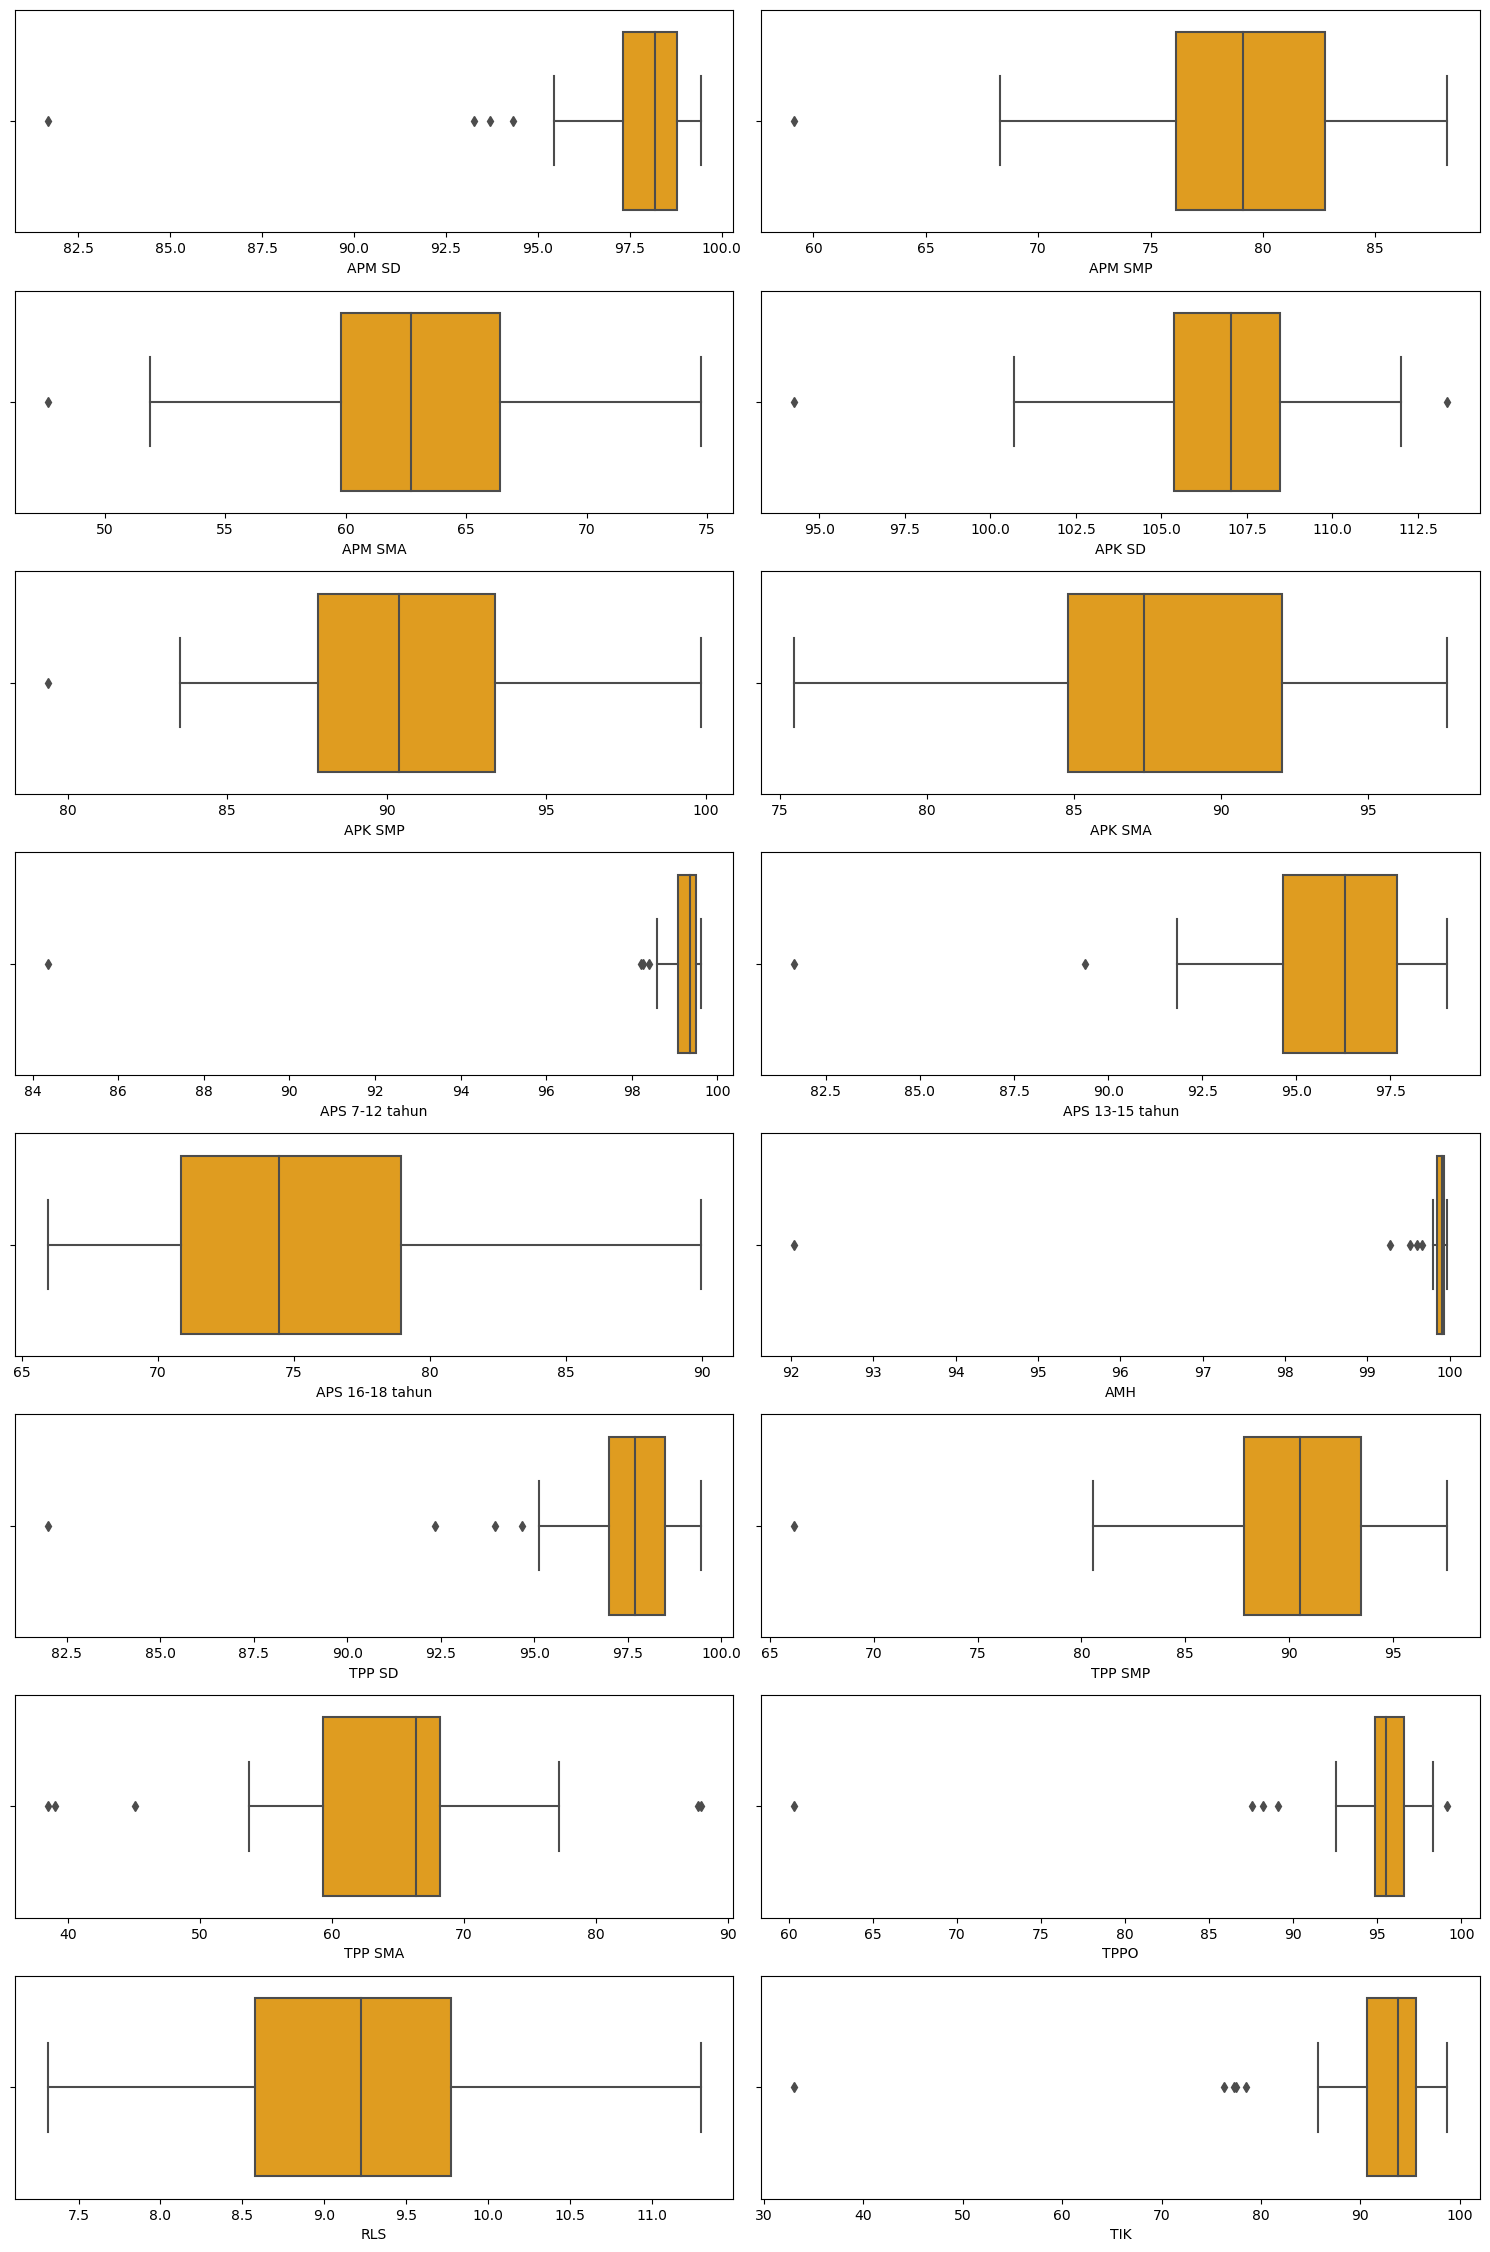

In [36]:
plt.figure(figsize=(15, 25))
for i in range(0, len(columns)):
    plt.subplot(9, 2, i+1)
    sns.boxplot(x = df_clean[columns[i]], color = 'orange')
    plt.tight_layout()

plt.show()

**Interpretasi:**<br>
- Data variabel APM SD, APS 7-12 tahun, APS 13-15 tahun, AMH, TPP SD, TPP SMP, TPPO, dan TIK mempunyai distribusi menjurai ke bawah atau menceng kiri.
- Data variabel APM SMP dan APK SD mempunyai distribusi agak menjurai ke bawah atau agak menceng kiri.
- Data variabel APM SMA, APK SMP, APK SMA, TPP SMA, dan RLS mempunyai distribusi yang mendekati simetris.
- Data variabel APS 16-18 tahun mempunyai distribusi agak menjurai ke atas atau agak menceng kanan.

### Analisis Multivariat

#### *Heatmap* Korelasi

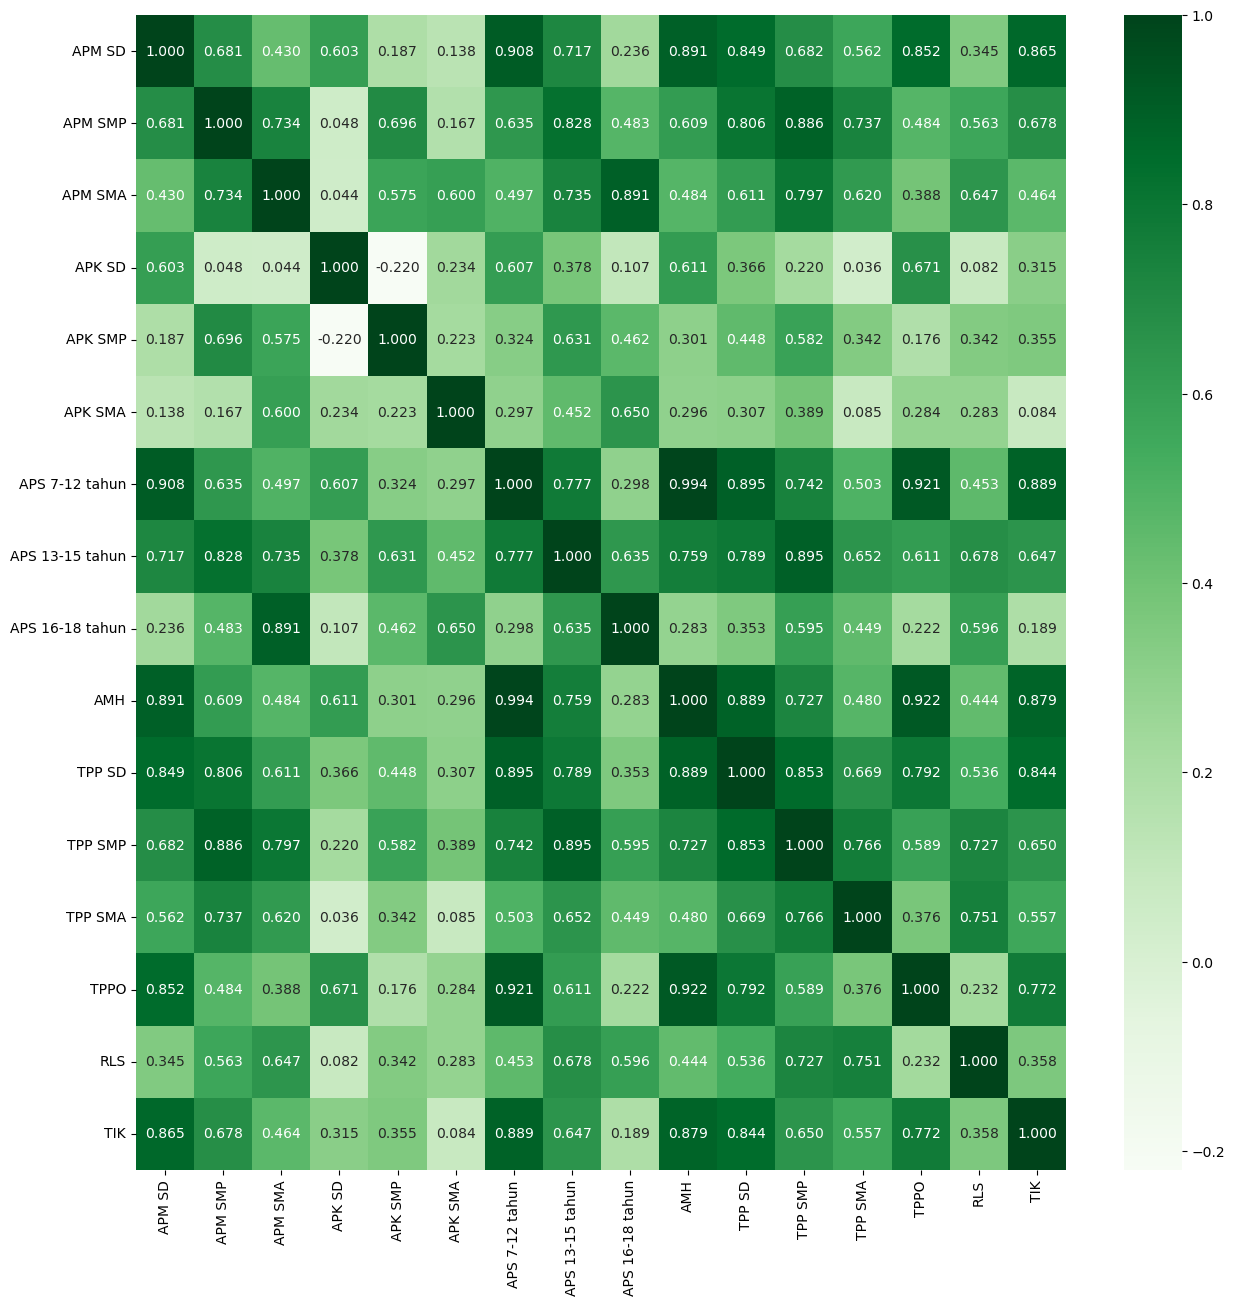

In [37]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean.corr(), cmap = 'Greens', annot = True, fmt = '.3f')
plt.show()

**Interpretasi:**<br>
- Korelasi positif terbesar terdapat di antara variabel AMH dan APS 7-12 tahun, yaitu senilai 0,994. Artinya, terdapat hubungan berbanding lurus yang sangat kuat antara Angka Melek Huruf dengan Angka Partisipasi Sekolah usia 7 hingga 12 tahun.
- Korelasi negatif terbesar terdapat di antara variabel APK SD dan APK SMP, yaitu senilai -0,220. Artinya, terdapat hubungan berbanding terbalik yang lemah antara Angka Partisipasi Kasar tingkat SD dengan SMP.

#### *Pair plot*

<Figure size 1500x1500 with 0 Axes>

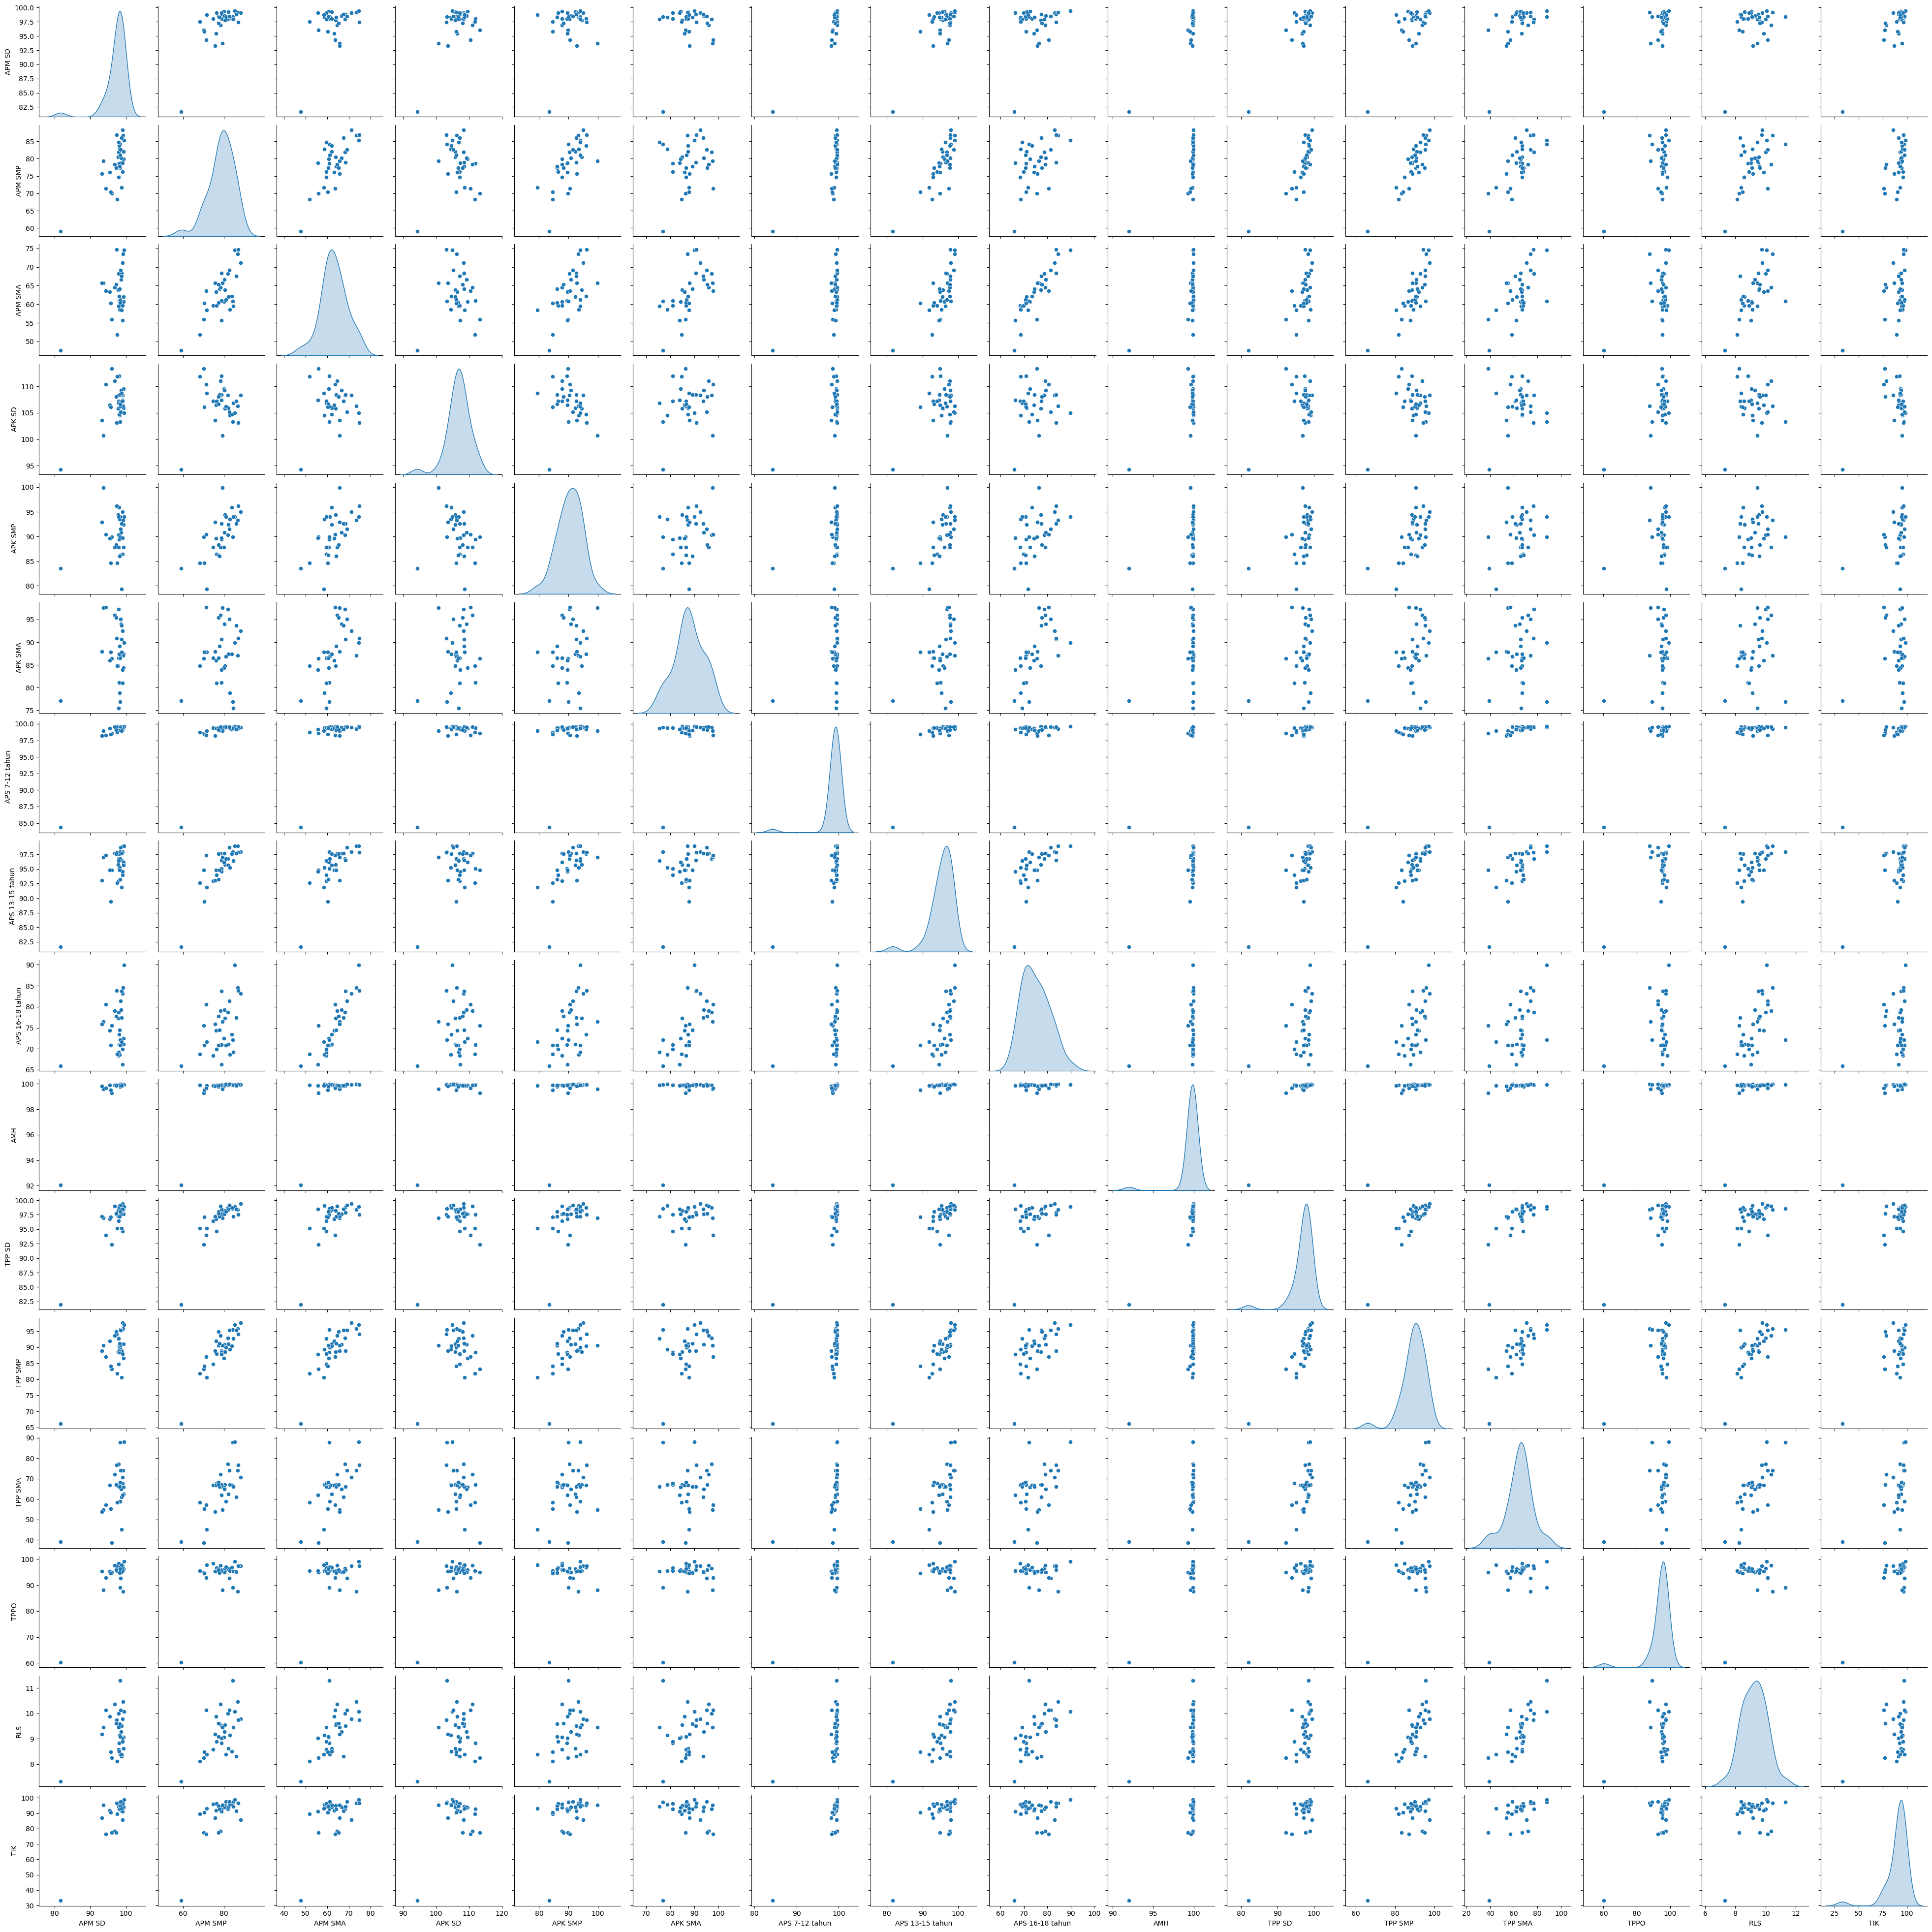

In [38]:
plt.figure(figsize = (15, 15))
sns.pairplot(df_clean, diag_kind = 'kde')
plt.show()

**Interpretasi:**<br>
Ditunjukkan diagram pencar dan diagram distribusi antara setiap variabel yang ada dengan interpretasi serupa seperti untuk diagram kotak dan titik.

## Praproses Data (Bagian 2)

#### Penskalaan data
Karena data APK bernilai melebihi 100, dilakukan penskalaan agar sedemikian hingga nilai maksimumnya sama dengan 100.

In [39]:
scaler = StandardScaler()

In [40]:
df_clean = pd.DataFrame(scaler.fit_transform(df_clean), columns = columns)

In [41]:
Provinsi = Provinsi.tolist()
del Provinsi[34]

In [42]:
df_clean["Provinsi"] = Provinsi
df_clean = df_clean.set_index("Provinsi")
df_clean

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK
Provinsi,,,,,,,,,,,,,,,,
ACEH,0.575704,1.556740,1.372180,0.442780,1.104300,0.796452,0.255111,0.768671,1.381814,0.235364,0.807356,1.375791,0.559584,0.507293,0.674617,-0.380086
SUMATERA UTARA,0.234484,0.509826,0.879613,0.434090,-0.030470,1.590766,0.278713,0.406412,0.611110,0.220308,0.574060,0.558586,1.166205,0.339096,0.922987,0.232910
SUMATERA BARAT,0.489602,0.020060,0.898361,0.480438,0.514027,0.480416,0.298381,0.326593,1.487699,0.182667,0.288190,-0.125546,0.119339,0.247211,0.326899,0.351888
RIAU,0.170704,0.278091,0.129684,-0.287207,0.966971,-0.501492,0.321983,0.080994,0.378511,0.220308,0.396623,-0.176728,0.208136,0.189588,0.364154,0.415688
JAMBI,0.658617,0.195916,-0.405493,0.793290,-0.625562,-0.589373,0.211840,0.228353,-0.452947,0.205251,0.206043,-0.511117,0.109058,0.259670,-0.219515,0.301883
SUMATERA SELATAN,0.259995,-0.009523,-0.359475,1.502999,-0.247305,-1.133563,0.231509,-0.121626,-0.730678,0.242892,0.176470,-0.197201,0.223091,0.212948,-0.529978,0.227737
BENGKULU,0.425822,0.248508,0.596685,0.700593,0.085175,1.039816,0.274779,0.698061,0.723938,0.167611,0.215901,0.212255,0.018392,0.100817,0.041273,0.336369
LAMPUNG,0.645861,0.547626,-0.195854,-0.261136,0.465841,-0.070534,0.302315,0.053364,-0.694225,0.205251,0.465626,0.242964,-0.211545,0.329752,-0.790766,0.332058
KEP. BANGKA BELITUNG,0.237672,-0.666926,-0.589567,0.129929,-0.623153,-0.222637,0.243310,-0.754044,-1.166368,0.190195,-0.178403,-0.826739,0.204397,0.644342,-0.840440,0.515699


## *Clustering*

In [43]:
#Libraries
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, pairwise_distances

### *Clustering K-Means*

#### Kurva Elbow

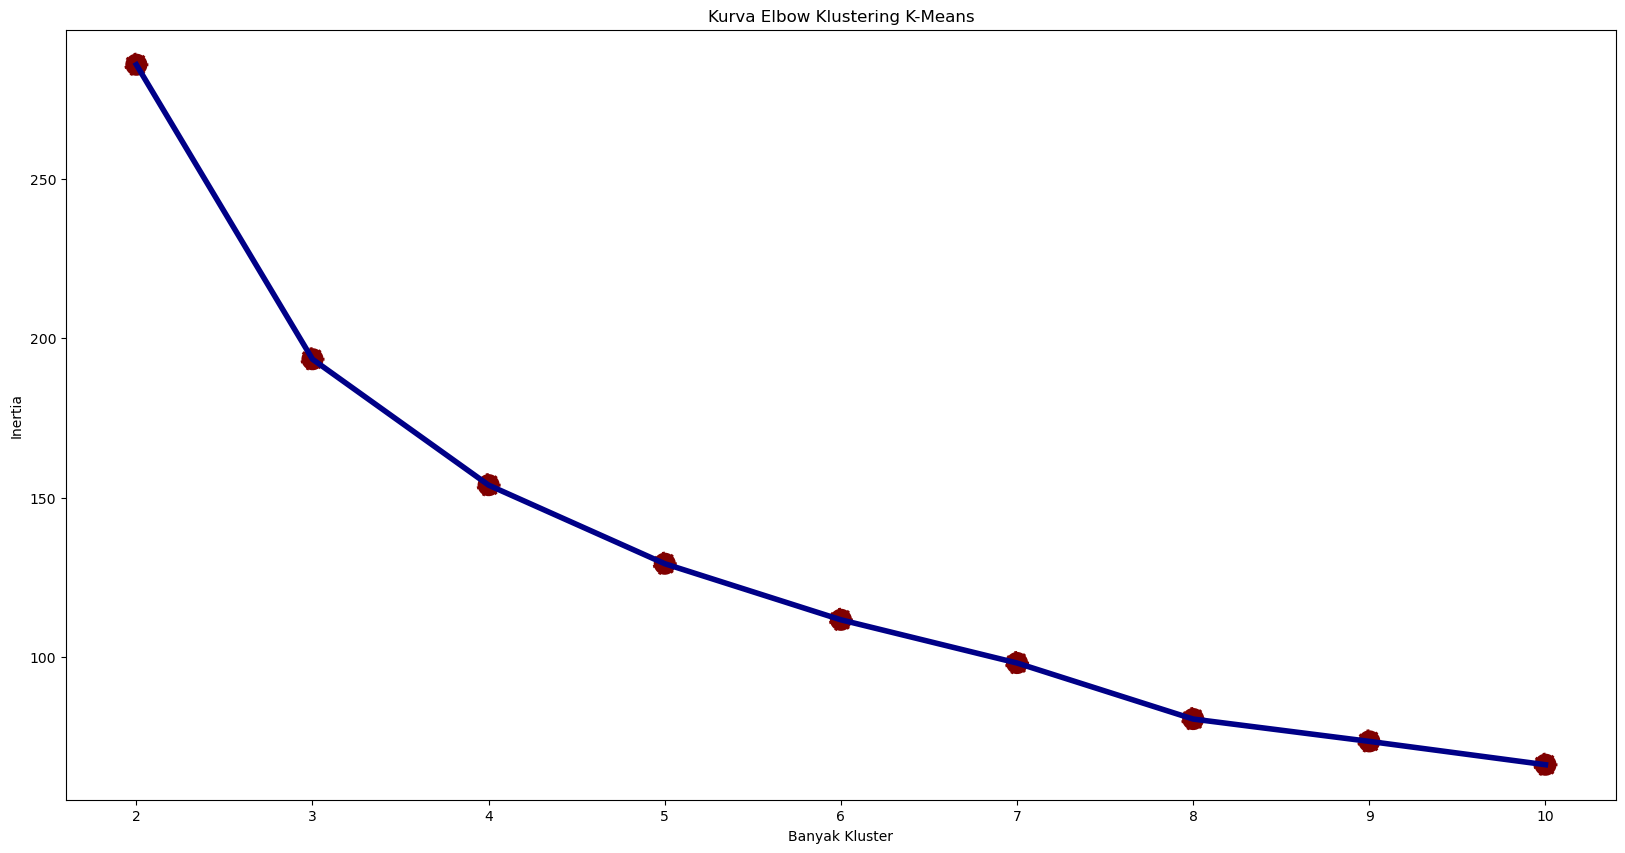

In [44]:
inertia = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df_clean)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_clean, kmeans.predict(df_clean)))

plt.figure(figsize = (20, 10))
sns.lineplot(x = range(2, 11), y = inertia, color = '#000087', linewidth = 4)
sns.scatterplot(x = range(2, 11), y = inertia, s = 300, color = '#800000',  linestyle = '--')
plt.xlabel("Banyak Kluster")
plt.ylabel("Inertia")
plt.title("Kurva Elbow Klustering K-Means")
plt.show()

**Interpretasi:**<br>
Banyak kluster terbaik menurut kurva Elbow adalah tiga.

#### *Silhouette Score*

In [45]:
pd.DataFrame(silhouette_scores, range(2, 11))

,0
2,0.735188
3,0.248019
4,0.227902
5,0.216309
6,0.214098
7,0.209833
8,0.216633
9,0.190085
10,0.195100


**Interpretasi:**<br>
Banyak kluster terbaik menurut nilai *silhouette* adalah dua.

#### *Gap statistic*

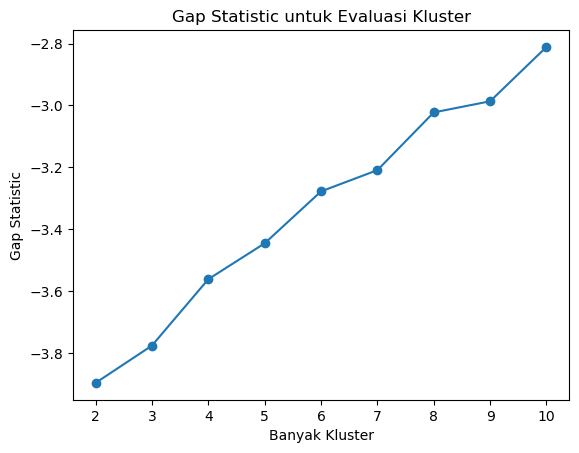

In [46]:
df_ref = np.random.rand(*df_clean.shape)
gap = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df_clean)
    log_inertia = np.log(inertia[i-2])
    ref_log_inertia = np.mean(np.log(pairwise_distances(df_ref, kmeans.cluster_centers_, metric = 'euclidean')))
    gap.append(ref_log_inertia - log_inertia)

plt.plot(range(2, 11), gap, marker='o')
plt.xlabel('Banyak Kluster')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic untuk Evaluasi Kluster')
plt.show()

**Interpretasi:**<br>
Banyak kluster terbaik menurut *gap statistic* adalah sepuluh.

#### Pembentukan Kluster

In [47]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(df_clean)

In [48]:
clusters = kmeans.labels_
df_clust = df_clean.copy()

df_clust["Kluster K-Means"] = clusters
df_clust.head()

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means
Provinsi,,,,,,,,,,,,,,,,,
ACEH,0.575704,1.556740,1.372180,0.442780,1.104300,0.796452,0.255111,0.768671,1.381814,0.235364,0.807356,1.375791,0.559584,0.507293,0.674617,-0.380086,2
SUMATERA UTARA,0.234484,0.509826,0.879613,0.434090,-0.030470,1.590766,0.278713,0.406412,0.611110,0.220308,0.574060,0.558586,1.166205,0.339096,0.922987,0.232910,2
SUMATERA BARAT,0.489602,0.020060,0.898361,0.480438,0.514027,0.480416,0.298381,0.326593,1.487699,0.182667,0.288190,-0.125546,0.119339,0.247211,0.326899,0.351888,2
RIAU,0.170704,0.278091,0.129684,-0.287207,0.966971,-0.501492,0.321983,0.080994,0.378511,0.220308,0.396623,-0.176728,0.208136,0.189588,0.364154,0.415688,2
JAMBI,0.658617,0.195916,-0.405493,0.793290,-0.625562,-0.589373,0.211840,0.228353,-0.452947,0.205251,0.206043,-0.511117,0.109058,0.259670,-0.219515,0.301883,0


#### *PCA*  untuk Visualisasi Kluster

In [49]:
#Library
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components = 2)

pca.fit(df_clean)
pcs = pca.transform(df_clean)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,-2.888593,1.588499
1,-2.039796,0.842316
2,-1.407676,0.585319
3,-0.826668,0.289382
4,-0.194535,-1.404004


In [51]:
df_pca['Kluster K-Means'] = clusters
df_pca.head()

,PC 1,PC 2,Kluster K-Means
0,-2.888593,1.588499,2
1,-2.039796,0.842316,2
2,-1.407676,0.585319,2
3,-0.826668,0.289382,2
4,-0.194535,-1.404004,0


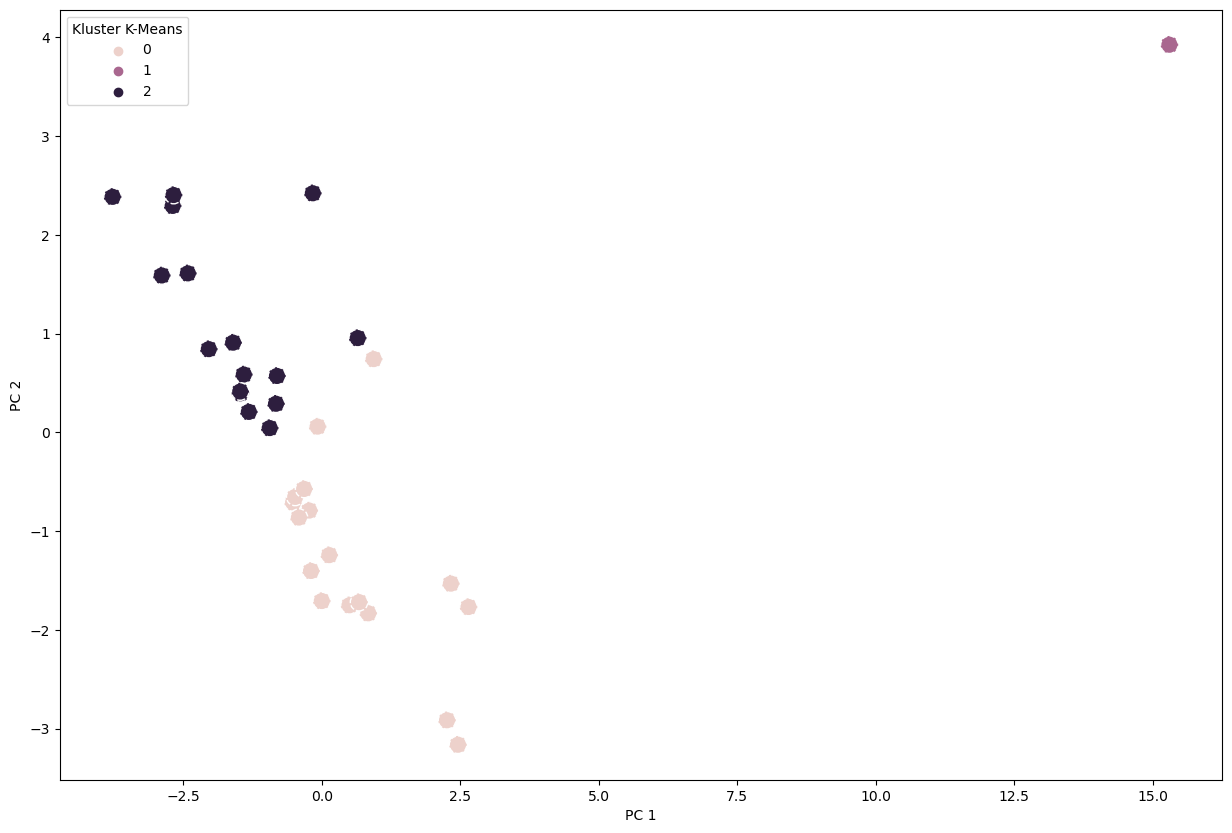

In [52]:
fig, ax = plt.subplots(figsize = (15, 10))

sns.scatterplot(
    x = 'PC 1', y = 'PC 2',
    hue = 'Kluster K-Means',
    linestyle = '--',
    data = df_pca,
    s = 160,
    ax = ax
)

plt.show()

#### Analisis Kluster

In [53]:
df_clust.groupby("Kluster K-Means").agg(['mean', 'median']).transpose()

Kluster K-Means                0         1         2
APM SD          mean    0.142003 -4.976303  0.160141
                median  0.320586 -4.976303  0.307830
APM SMP         mean   -0.312895 -3.220937  0.533759
                median -0.216605 -3.220937  0.576388
APM SMA         mean   -0.548962 -2.638237  0.748162
                median -0.489008 -2.638237  0.681904
APK SD          mean    0.278175 -3.635876 -0.068319
                median  0.106755 -3.635876 -0.022152
APK SMP         mean   -0.413120 -1.668779  0.543239
                median -0.247305 -1.668779  0.516436
APK SMA         mean   -0.506264 -1.818026  0.651532
                median -0.242917 -1.818026  0.893629
APS 7-12 tahun  mean    0.135249 -5.680813  0.211349
                median  0.211840 -5.680813  0.264945
APS 13-15 tahun mean   -0.383658 -4.235412  0.672350
                median -0.201445 -4.235412  0.691921
APS 16-18 tahun mean   -0.685546 -1.598587  0.828305
                median -0.744564 -1.598587  0.699637
AMH             mean    0.156983 -5.711834  0.190195
                median  0.205251 -5.711834  0.220308
TPP SD          mean   -0.046002 -4.929761  0.356987
                median  0.081180 -4.929761  0.470555
TPP SMP         mean   -0.319536 -3.993196  0.589082
                median -0.197201 -3.993196  0.739429
TPP SMA         mean   -0.352135 -2.399681  0.524123
                median  0.109058 -2.399681  0.392739
TPPO            mean    0.266632 -5.275249  0.046406
                median  0.202047 -5.275249  0.218399
RLS             mean   -0.459850 -2.405172  0.638914
                median -0.443048 -2.405172  0.643571
TIK             mean    0.182499 -4.920221  0.113609
                median  0.252740 -4.920221  0.383788

In [54]:
df_clust["Kluster K-Means"].value_counts()

0    17
2    16
1     1
Name: Kluster K-Means, dtype: int64

In [65]:
df_clust[df_clust["Kluster K-Means"] == 0]

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means,Kluster K-Medoids
Provinsi,,,,,,,,,,,,,,,,,,
JAMBI,0.658617,0.195916,-0.405493,0.793290,-0.625562,-0.589373,0.211840,0.228353,-0.452947,0.205251,0.206043,-0.511117,0.109058,0.259670,-0.219515,0.301883,0,1
SUMATERA SELATAN,0.259995,-0.009523,-0.359475,1.502999,-0.247305,-1.133563,0.231509,-0.121626,-0.730678,0.242892,0.176470,-0.197201,0.223091,0.212948,-0.529978,0.227737,0,4
LAMPUNG,0.645861,0.547626,-0.195854,-0.261136,0.465841,-0.070534,0.302315,0.053364,-0.694225,0.205251,0.465626,0.242964,-0.211545,0.329752,-0.790766,0.332058,0,3
KEP. BANGKA BELITUNG,0.237672,-0.666926,-0.589567,0.129929,-0.623153,-0.222637,0.243310,-0.754044,-1.166368,0.190195,-0.178403,-0.826739,0.204397,0.644342,-0.840440,0.515699,0,4
JAWA BARAT,0.326964,0.667603,-0.768527,-0.655097,0.728452,-1.513820,0.235442,-0.057156,-1.124708,0.257948,0.685779,-0.047067,0.221222,0.188030,-0.132586,0.472591,0,3
JAWA TENGAH,0.358854,0.375058,-0.330500,-0.180026,0.870600,-0.166866,0.310182,0.403342,-0.749772,0.250420,0.334192,0.077475,-0.554580,0.449670,-1.076392,0.630366,0,3
BANTEN,0.212161,0.974938,-0.608315,0.022748,0.870600,-2.083361,0.211840,0.286683,-1.027503,0.212780,0.081180,0.526171,0.124948,0.161555,0.264806,0.376029,0,3
NUSA TENGGARA TIMUR,-0.377800,-1.427870,-1.211667,1.896960,-0.134069,-0.242917,-0.079252,-0.192236,0.071271,-0.269019,-1.525607,-1.077531,-2.450155,0.122621,-1.237832,-1.106025,0,4
KALIMANTAN BARAT,0.081413,-1.712197,-1.915578,1.456651,-1.408577,-0.511632,-0.024181,-0.864563,-1.114293,0.197723,-0.612137,-1.321498,-0.587295,0.202047,-1.424110,-0.055051,0,4


In [55]:
df_clust[df_clust["Kluster K-Means"] == 1]

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means
Provinsi,,,,,,,,,,,,,,,,,
PAPUA,-4.976303,-3.220937,-2.638237,-3.635876,-1.668779,-1.818026,-5.680813,-4.235412,-1.598587,-5.711834,-4.929761,-3.993196,-2.399681,-5.275249,-2.405172,-4.920221,1


In [66]:
df_clust[df_clust["Kluster K-Means"] == 2]

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means,Kluster K-Medoids
Provinsi,,,,,,,,,,,,,,,,,,
ACEH,0.575704,1.556740,1.372180,0.442780,1.104300,0.796452,0.255111,0.768671,1.381814,0.235364,0.807356,1.375791,0.559584,0.507293,0.674617,-0.380086,2,0
SUMATERA UTARA,0.234484,0.509826,0.879613,0.434090,-0.030470,1.590766,0.278713,0.406412,0.611110,0.220308,0.574060,0.558586,1.166205,0.339096,0.922987,0.232910,2,0
SUMATERA BARAT,0.489602,0.020060,0.898361,0.480438,0.514027,0.480416,0.298381,0.326593,1.487699,0.182667,0.288190,-0.125546,0.119339,0.247211,0.326899,0.351888,2,0
RIAU,0.170704,0.278091,0.129684,-0.287207,0.966971,-0.501492,0.321983,0.080994,0.378511,0.220308,0.396623,-0.176728,0.208136,0.189588,0.364154,0.415688,2,2
BENGKULU,0.425822,0.248508,0.596685,0.700593,0.085175,1.039816,0.274779,0.698061,0.723938,0.167611,0.215901,0.212255,0.018392,0.100817,0.041273,0.336369,2,1
KEP. RIAU,0.617161,1.318432,1.777823,-0.159749,0.682676,-0.124615,0.192172,1.091020,1.631772,0.250420,0.455769,1.049932,0.864296,-1.034511,1.506656,0.551047,2,0
DKI JAKARTA,0.352476,0.900981,-0.379927,-1.005606,-0.131660,-1.843376,0.255111,0.765601,-0.527587,0.227836,0.521486,0.995338,2.152315,-0.794675,2.549811,0.624331,2,2
DI YOGYAKARTA,0.690507,1.075192,1.941444,-0.536329,0.863372,0.357044,0.314116,1.091020,2.570849,0.227836,0.629919,1.278545,2.171943,0.773604,1.022335,0.742447,2,0
JAWA TIMUR,0.263184,0.831953,-0.171992,-0.617439,1.328362,-0.075604,0.137100,0.670432,-0.301930,0.235364,0.564202,0.154248,0.204397,0.409178,-0.927370,0.449312,2,3


### *Clustering K-Medoids*

#### Kurva Elbow

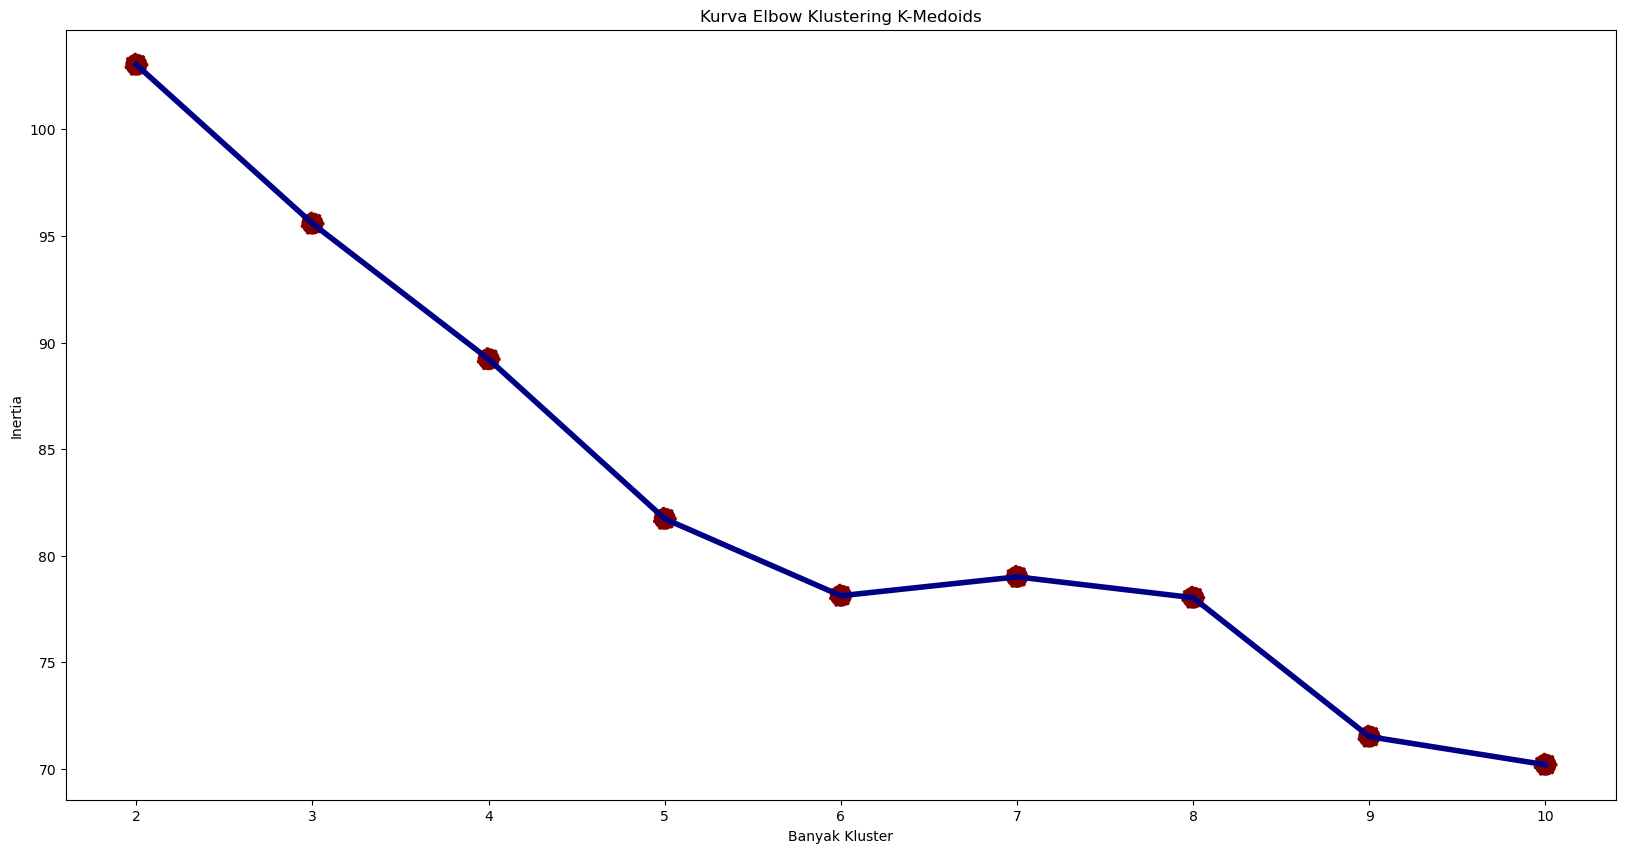

In [56]:
inertia = []
silhouette_scores = []

for i in range(2, 11):
    kmedoids = KMedoids(n_clusters = i, random_state = 0)
    kmedoids.fit(df_clean)
    inertia.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(df_clean, kmedoids.predict(df_clean)))

plt.figure(figsize = (20, 10))
sns.lineplot(x = range(2, 11), y = inertia, color = '#000087', linewidth = 4)
sns.scatterplot(x = range(2, 11), y = inertia, s = 300, color = '#800000',  linestyle = '--')
plt.xlabel("Banyak Kluster")
plt.ylabel("Inertia")
plt.title("Kurva Elbow Klustering K-Medoids")
plt.show()

**Interpretasi:**<br>
Banyak kluster terbaik menurut kurva Elbow adalah lima.

#### *Silhouette Scores*

In [57]:
pd.DataFrame(silhouette_scores, range(2, 11))

,0
2,0.138903
3,0.088490
4,0.062041
5,0.052432
6,0.054814
7,-0.043661
8,-0.101522
9,-0.063462
10,-0.087223


**Interpretasi:**<br>
Banyak kluster terbaik menurut nilai *silhouette* adalah dua.

#### *Gap statistic*

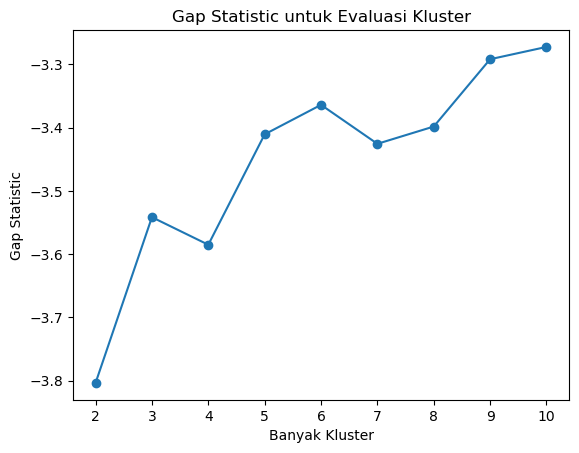

In [58]:
df_ref = np.random.rand(*df_clean.shape)
gap = []

for i in range(2, 11):
    kmedoids = KMedoids(n_clusters = i, random_state = 0)
    kmedoids.fit(df_clean)
    log_inertia = np.log(inertia[i-2])
    ref_log_inertia = np.mean(np.log(pairwise_distances(df_ref, kmedoids.cluster_centers_, metric = 'euclidean')))
    gap.append(ref_log_inertia - log_inertia)

plt.plot(range(2, 11), gap, marker='o')
plt.xlabel('Banyak Kluster')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic untuk Evaluasi Kluster')
plt.show()

**Interpretasi:**<br>
Banyak kluster terbaik menurut *gap statistic* adalah sepuluh.

#### Pembentukan Kluster

In [59]:
kmedoids = KMedoids(n_clusters = 5, random_state = 0).fit(df_clean)

In [60]:
clusters = kmedoids.labels_

df_clust["Kluster K-Medoids"] = clusters
df_clust.head()

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means,Kluster K-Medoids
Provinsi,,,,,,,,,,,,,,,,,,
ACEH,0.575704,1.556740,1.372180,0.442780,1.104300,0.796452,0.255111,0.768671,1.381814,0.235364,0.807356,1.375791,0.559584,0.507293,0.674617,-0.380086,2,0
SUMATERA UTARA,0.234484,0.509826,0.879613,0.434090,-0.030470,1.590766,0.278713,0.406412,0.611110,0.220308,0.574060,0.558586,1.166205,0.339096,0.922987,0.232910,2,0
SUMATERA BARAT,0.489602,0.020060,0.898361,0.480438,0.514027,0.480416,0.298381,0.326593,1.487699,0.182667,0.288190,-0.125546,0.119339,0.247211,0.326899,0.351888,2,0
RIAU,0.170704,0.278091,0.129684,-0.287207,0.966971,-0.501492,0.321983,0.080994,0.378511,0.220308,0.396623,-0.176728,0.208136,0.189588,0.364154,0.415688,2,2
JAMBI,0.658617,0.195916,-0.405493,0.793290,-0.625562,-0.589373,0.211840,0.228353,-0.452947,0.205251,0.206043,-0.511117,0.109058,0.259670,-0.219515,0.301883,0,1


#### *PCA* untuk Visualisasi Kluster

In [61]:
df_pca['Kluster K-Medoids'] = clusters
df_pca.head()

,PC 1,PC 2,Kluster K-Means,Kluster K-Medoids
0,-2.888593,1.588499,2,0
1,-2.039796,0.842316,2,0
2,-1.407676,0.585319,2,0
3,-0.826668,0.289382,2,2
4,-0.194535,-1.404004,0,1


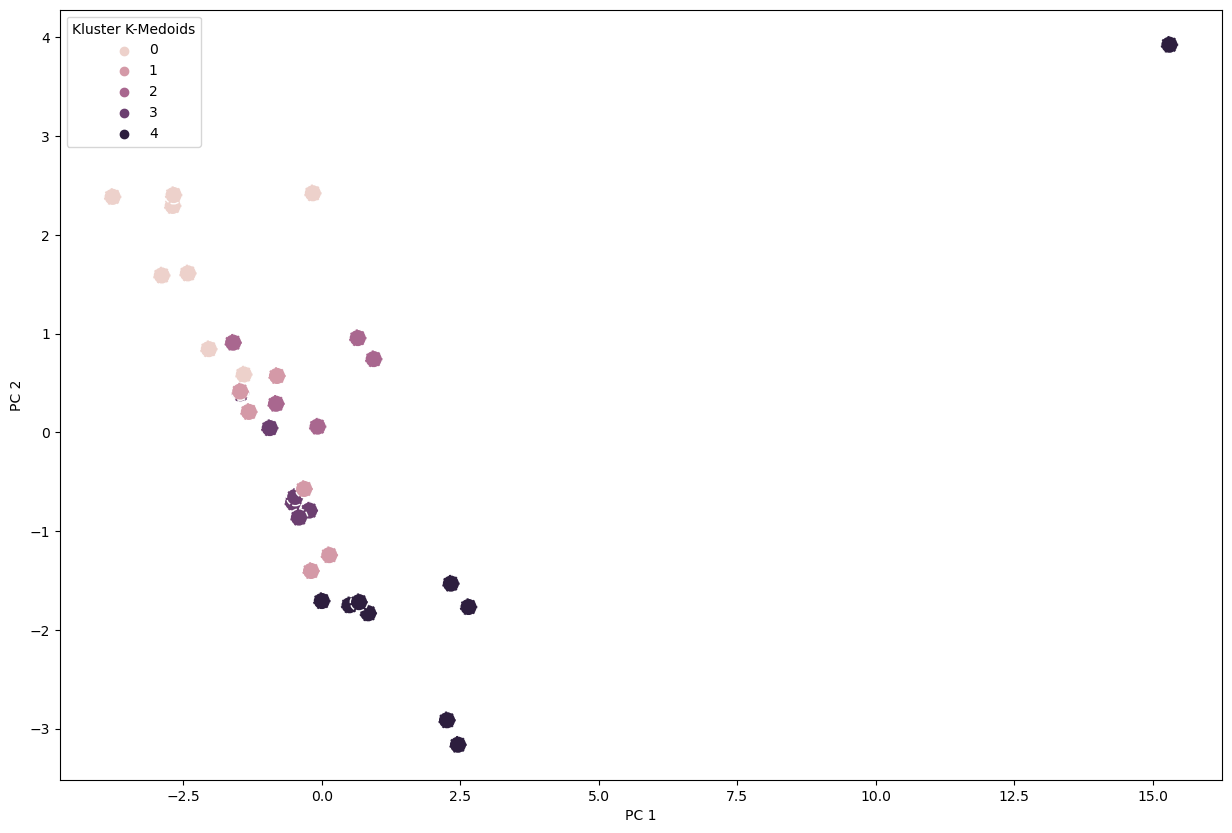

In [62]:
fig, ax = plt.subplots(figsize = (15, 10))

sns.scatterplot(
    x = 'PC 1', y = 'PC 2',
    hue = 'Kluster K-Medoids',
    linestyle = '--',
    data = df_pca,
    s = 160,
    ax = ax
)

plt.show()

#### Analisis Kluster

In [63]:
df_clust.groupby("Kluster K-Medoids").agg(['mean', 'median']).transpose()

Kluster K-Medoids              0         1         2         3         4
APM SD          mean    0.238470  0.275940 -0.456249  0.384365 -0.398705
                median  0.433795  0.342909 -0.581894  0.342909  0.237672
APM SMP         mean    0.820860 -0.034997 -0.194582  0.766487 -1.109212
                median  0.859071 -0.109777 -0.431904  0.749778 -1.163265
APM SMA         mean    1.288026  0.089631  0.064235 -0.218011 -1.095011
                median  1.196628  0.209790  0.093892 -0.263177 -0.790684
APK SD          mean   -0.328848  0.589067 -0.257659 -0.262584  0.217798
                median -0.311829  0.591964 -0.287207 -0.220581  0.167587
APK SMP         mean    0.880839 -0.624759  0.245633  0.797117 -1.034336
                median  0.773024 -0.624357  0.003260  0.799526 -0.972498
APK SMA         mean    0.810606  0.517878 -0.189174 -0.486563 -0.636319
                median  0.651954  0.631674 -0.302068 -0.121235 -0.511632
APS 7-12 tahun  mean    0.252161  0.211840  0.072588  0.224297 -0.555227
                median  0.288547  0.231509  0.215774  0.223641  0.054493
APS 13-15 tahun mean    0.739123  0.228865  0.100641  0.342966 -1.094130
                median  0.751786  0.441717  0.080994  0.345013 -0.754044
APS 16-18 tahun mean    1.315202  0.088918  0.154590 -0.583422 -0.925282
                median  1.434756  0.169344  0.121609 -0.721998 -0.912938
AMH             mean    0.197723  0.185176  0.166105  0.225326 -0.541703
                median  0.231600  0.193959  0.212780  0.224072  0.167611
TPP SD          mean    0.454947  0.290380 -0.020682  0.436053 -0.877197
                median  0.514914  0.227401  0.064751  0.475484 -0.612137
TPP SMP         mean    0.758622  0.292724  0.136846  0.324571 -1.161886
                median  0.881885  0.244670 -0.113604  0.198606 -0.925691
TPP SMA         mean    0.742668  0.250821  0.161962 -0.093305 -0.855139
                median  0.867568  0.173085  0.184768 -0.043299 -0.587295
TPPO            mean    0.017303  0.256036 -0.092298  0.279656 -0.321232
                median  0.293153  0.258112  0.180244  0.258891  0.202047
RLS             mean    0.801906  0.314480  0.940373 -0.637605 -1.019819
                median  0.798802  0.233760  0.773965 -0.859068 -0.964625
TIK             mean    0.394026 -0.136382 -0.058328  0.397583 -0.491975
                median  0.498886  0.266965  0.134624  0.412670  0.102724
Kluster K-Means mean    2.000000  1.000000  1.200000  0.666667  0.111111
                median  2.000000  1.000000  2.000000  0.000000  0.000000

In [64]:
df_clust["Kluster K-Medoids"].value_counts()

4    9
0    8
1    6
3    6
2    5
Name: Kluster K-Medoids, dtype: int64

In [67]:
df_clust[df_clust["Kluster K-Medoids"] == 0]

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means,Kluster K-Medoids
Provinsi,,,,,,,,,,,,,,,,,,
ACEH,0.575704,1.556740,1.372180,0.442780,1.104300,0.796452,0.255111,0.768671,1.381814,0.235364,0.807356,1.375791,0.559584,0.507293,0.674617,-0.380086,2,0
SUMATERA UTARA,0.234484,0.509826,0.879613,0.434090,-0.030470,1.590766,0.278713,0.406412,0.611110,0.220308,0.574060,0.558586,1.166205,0.339096,0.922987,0.232910,2,0
SUMATERA BARAT,0.489602,0.020060,0.898361,0.480438,0.514027,0.480416,0.298381,0.326593,1.487699,0.182667,0.288190,-0.125546,0.119339,0.247211,0.326899,0.351888,2,0
KEP. RIAU,0.617161,1.318432,1.777823,-0.159749,0.682676,-0.124615,0.192172,1.091020,1.631772,0.250420,0.455769,1.049932,0.864296,-1.034511,1.506656,0.551047,2,0
DI YOGYAKARTA,0.690507,1.075192,1.941444,-0.536329,0.863372,0.357044,0.314116,1.091020,2.570849,0.227836,0.629919,1.278545,2.171943,0.773604,1.022335,0.742447,2,0
BALI,0.062279,1.338154,1.980645,-1.057748,1.395822,0.507457,0.298381,0.734901,1.510264,0.235364,0.183042,0.782080,1.112927,0.496391,0.612524,0.565704,2,0
KALIMANTAN TIMUR,0.377987,0.642950,1.021077,-0.463910,0.249006,1.229100,0.306249,1.011200,1.091932,0.250420,0.718638,0.981690,0.870839,-0.254265,1.096846,0.641574,2,0
KALIMANTAN UTARA,-1.139965,0.105523,0.433064,-1.770354,2.267981,1.648227,0.074161,0.483162,0.236173,-0.020592,-0.017396,0.167897,-0.923787,-0.936396,0.252388,0.446726,2,0


In [70]:
df_clust[df_clust["Kluster K-Medoids"] == 1]

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means,Kluster K-Medoids
Provinsi,,,,,,,,,,,,,,,,,,
JAMBI,0.658617,0.195916,-0.405493,0.793290,-0.625562,-0.589373,0.211840,0.228353,-0.452947,0.205251,0.206043,-0.511117,0.109058,0.259670,-0.219515,0.301883,0,1
BENGKULU,0.425822,0.248508,0.596685,0.700593,0.085175,1.039816,0.274779,0.698061,0.723938,0.167611,0.215901,0.212255,0.018392,0.100817,0.041273,0.336369,2,1
SULAWESI SELATAN,0.365232,-0.216605,-0.454920,-0.029394,-1.023093,-0.224327,0.251177,-0.692644,-0.751507,0.129970,0.347335,0.167897,0.339929,0.326637,-0.194678,0.403618,0,1
SULAWESI TENGGARA,0.320586,-0.159082,0.170589,0.483335,-1.059232,0.223531,0.101697,-0.201445,-0.105783,0.212780,0.081180,0.277085,0.120274,0.071227,0.426247,0.232048,0,1
MALUKU,-0.116304,-0.060471,0.248991,1.227806,-0.623153,1.376132,0.298381,0.685781,0.675336,0.212780,0.652920,0.696777,0.691377,0.521309,1.394890,-1.001703,2,1
MALUKU UTARA,0.001688,-0.218248,0.381932,0.358774,-0.502689,1.281491,0.133167,0.655082,0.444472,0.182667,0.238902,0.913447,0.225895,0.256555,0.438665,-1.090506,2,1


In [71]:
df_clust[df_clust["Kluster K-Medoids"] == 2]

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means,Kluster K-Medoids
Provinsi,,,,,,,,,,,,,,,,,,
RIAU,0.170704,0.278091,0.129684,-0.287207,0.966971,-0.501492,0.321983,0.080994,0.378511,0.220308,0.396623,-0.176728,0.208136,0.189588,0.364154,0.415688,2,2
DKI JAKARTA,0.352476,0.900981,-0.379927,-1.005606,-0.131660,-1.843376,0.255111,0.765601,-0.527587,0.227836,0.521486,0.995338,2.152315,-0.794675,2.549811,0.624331,2,2
SULAWESI UTARA,-0.581894,-0.431904,0.032534,-0.096020,-0.194301,-0.302068,0.215774,-0.183026,-0.140499,0.212780,-0.083113,0.411864,0.184768,0.180244,0.773965,0.134624,0,2
SULAWESI TENGAH,-1.280280,-0.510793,0.444995,-0.944774,0.583896,0.029178,-0.224798,-0.747904,0.121609,0.145027,0.064751,-0.113604,-1.023800,0.181801,-0.095330,-0.273178,0,2
PAPUA BARAT,-0.942249,-1.209283,0.093892,1.045309,0.003260,1.671888,-0.205130,0.587542,0.940916,0.024577,-1.003155,-0.432638,-0.711610,-0.218445,1.109264,-1.193103,2,2


In [72]:
df_clust[df_clust["Kluster K-Medoids"] == 3]

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means,Kluster K-Medoids
Provinsi,,,,,,,,,,,,,,,,,,
LAMPUNG,0.645861,0.547626,-0.195854,-0.261136,0.465841,-0.070534,0.302315,0.053364,-0.694225,0.205251,0.465626,0.242964,-0.211545,0.329752,-0.790766,0.332058,0,3
JAWA BARAT,0.326964,0.667603,-0.768527,-0.655097,0.728452,-1.513820,0.235442,-0.057156,-1.124708,0.257948,0.685779,-0.047067,0.221222,0.188030,-0.132586,0.472591,0,3
JAWA TENGAH,0.358854,0.375058,-0.330500,-0.180026,0.870600,-0.166866,0.310182,0.403342,-0.749772,0.250420,0.334192,0.077475,-0.554580,0.449670,-1.076392,0.630366,0,3
JAWA TIMUR,0.263184,0.831953,-0.171992,-0.617439,1.328362,-0.075604,0.137100,0.670432,-0.301930,0.235364,0.564202,0.154248,0.204397,0.409178,-0.927370,0.449312,2,3
BANTEN,0.212161,0.974938,-0.608315,0.022748,0.870600,-2.083361,0.211840,0.286683,-1.027503,0.212780,0.081180,0.526171,0.124948,0.161555,0.264806,0.376029,0,3
NUSA TENGGARA BARAT,0.499169,1.201743,0.767123,0.115445,0.518845,0.990805,0.148901,0.701131,0.397605,0.190195,0.485341,0.993632,-0.344272,0.139752,-1.163321,0.125140,2,3


In [73]:
df_clust[df_clust["Kluster K-Medoids"] == 4]

,APM SD,APM SMP,APM SMA,APK SD,APK SMP,APK SMA,APS 7-12 tahun,APS 13-15 tahun,APS 16-18 tahun,AMH,TPP SD,TPP SMP,TPP SMA,TPPO,RLS,TIK,Kluster K-Means,Kluster K-Medoids
Provinsi,,,,,,,,,,,,,,,,,,
SUMATERA SELATAN,0.259995,-0.009523,-0.359475,1.502999,-0.247305,-1.133563,0.231509,-0.121626,-0.730678,0.242892,0.176470,-0.197201,0.223091,0.212948,-0.529978,0.227737,0,4
KEP. BANGKA BELITUNG,0.237672,-0.666926,-0.589567,0.129929,-0.623153,-0.222637,0.243310,-0.754044,-1.166368,0.190195,-0.178403,-0.826739,0.204397,0.644342,-0.840440,0.515699,0,4
NUSA TENGGARA TIMUR,-0.377800,-1.427870,-1.211667,1.896960,-0.134069,-0.242917,-0.079252,-0.192236,0.071271,-0.269019,-1.525607,-1.077531,-2.450155,0.122621,-1.237832,-1.106025,0,4
KALIMANTAN BARAT,0.081413,-1.712197,-1.915578,1.456651,-1.408577,-0.511632,-0.024181,-0.864563,-1.114293,0.197723,-0.612137,-1.321498,-0.587295,0.202047,-1.424110,-0.055051,0,4
KALIMANTAN TENGAH,0.588460,0.001982,-1.264503,0.167587,-0.177436,-0.650215,0.160702,-0.259775,-1.530890,0.167611,0.498485,-0.302977,-0.262019,0.200489,-0.269189,0.102724,0,4
KALIMANTAN SELATAN,0.591649,-0.403965,-0.596384,0.106755,-0.972498,-1.157224,0.251177,-0.443975,-0.912938,0.220308,-0.760001,-0.275680,0.292259,0.381145,-0.443048,0.530355,0,4
GORONTALO,0.470468,-1.163265,-0.790684,0.547064,-2.666220,0.002137,0.054493,-1.113232,-0.600491,0.167611,-0.615423,-1.536462,-1.828578,0.555571,-1.063973,0.252740,0,4
SULAWESI BARAT,-0.463902,-1.380208,-0.489008,-0.211890,-1.410986,0.007207,-0.153992,-1.862310,-0.744564,-0.080816,0.051607,-0.925691,-0.888269,0.064998,-0.964625,0.024267,0,4
PAPUA,-4.976303,-3.220937,-2.638237,-3.635876,-1.668779,-1.818026,-5.680813,-4.235412,-1.598587,-5.711834,-4.929761,-3.993196,-2.399681,-5.275249,-2.405172,-4.920221,1,4
